Anna Dawidowicz 20/12/2025

# Example Dashboard


# Scatter plot with a legend

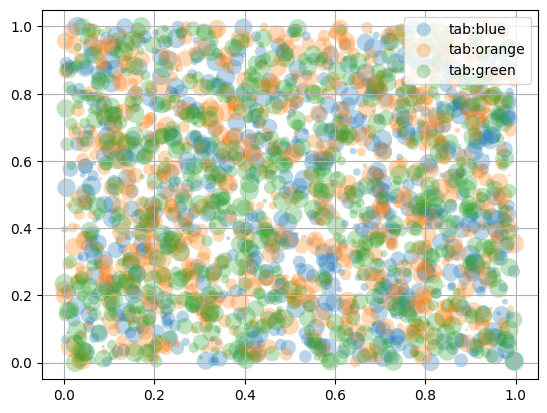

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)


fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    n = 750
    x, y = np.random.rand(2, n)
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

##
To create a scatter plot with a legend one may use a loop and create one scatter plot per item to appear in the legend and set the label accordingly.

The following also demonstrates how transparency of the markers can be adjusted by giving alpha a value between 0 and 1.

# Colormap normalizations SymLogNorm

Text(-2.5, 1.5, 'linear')

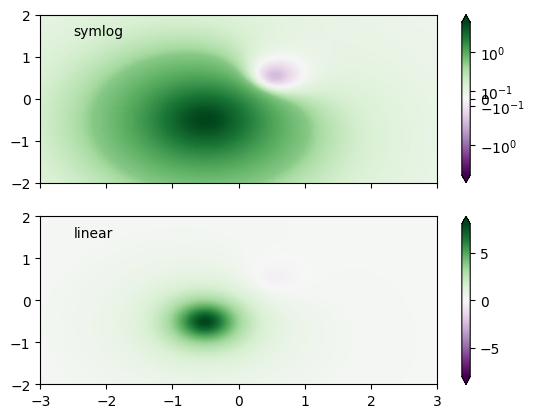

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.colors as colors


def rbf(x, y):
    return 1.0 / (1 + 5 * ((x ** 2) + (y ** 2)))

N = 200
gain = 8
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
Z1 = rbf(X + 0.5, Y + 0.5)
Z2 = rbf(X - 0.5, Y - 0.5)
Z = gain * Z1 - Z2

shadeopts = {'cmap': 'PRGn', 'shading': 'gouraud'}
colormap = 'PRGn'
lnrwidth = 0.5

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)

pcm = ax[0].pcolormesh(X, Y, Z,
                       norm=colors.SymLogNorm(linthresh=lnrwidth, linscale=1,
                                              vmin=-gain, vmax=gain, base=10),
                       **shadeopts)
fig.colorbar(pcm, ax=ax[0], extend='both')
ax[0].text(-2.5, 1.5, 'symlog')

pcm = ax[1].pcolormesh(X, Y, Z, vmin=-gain, vmax=gain,
                       **shadeopts)
fig.colorbar(pcm, ax=ax[1], extend='both')
ax[1].text(-2.5, 1.5, 'linear')

##
Demonstration of using norm to map colormaps onto data in non-linear ways.

Synthetic dataset consisting of two humps, one negative and one positive, the positive with 8-times the amplitude. Linearly, the negative hump is almost invisible, and it is very difficult to see any detail of its profile. With the logarithmic scaling applied to both positive and negative values, it is much easier to see the shape of each hump

# Triplot Demo

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.tri as tri

In [4]:
# First create the x and y coordinates of the points.
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

Text(0.5, 1.0, 'triplot of Delaunay triangulation')

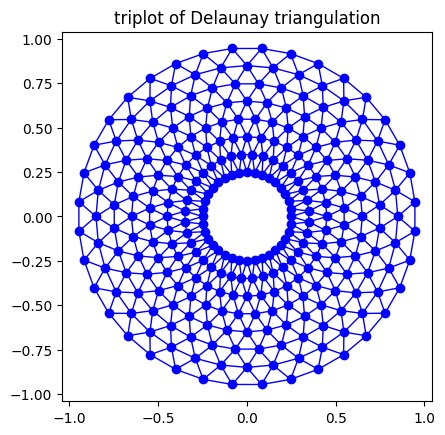

In [5]:
fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
ax1.triplot(triang, 'bo-', lw=1)
ax1.set_title('triplot of Delaunay triangulation')

##
1. Creating and plotting unstructured triangular grids.
2. Creating a Triangulation without specifying the triangles results in the Delaunay triangulation of the points.
3. Plot the triangulation.
    